In [442]:
import random
import numpy as np
import matplotlib.pyplot as plt
import cvxopt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


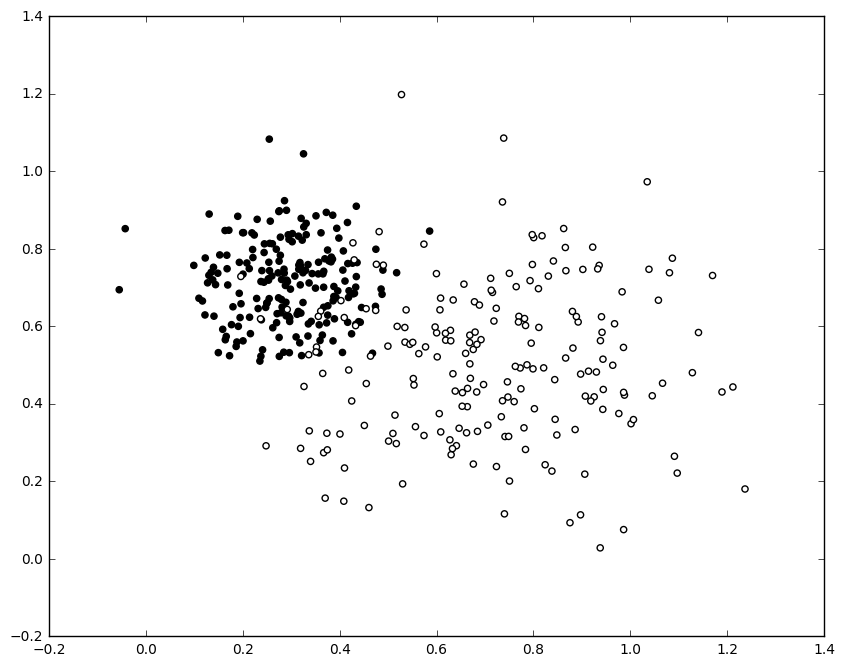

In [641]:
K = 2
N = 200

X = np.vstack((np.random.normal(loc=[0.3, 0.7], scale = 0.1, size = (N, 2)),
               np.random.normal(loc=[0.7, 0.5], scale = 0.2, size = (N, 2))))
y = np.hstack((-1 * np.ones(N), np.ones(N)))

train_test_split = np.array(random.sample(range(N * 2), N))

X_train = X[train_test_split, :]
y_train = y[train_test_split]
    
X_test = X[-train_test_split, :]
y_test = y[-train_test_split]

plt.scatter(X[:, 0], X[:, 1], c = y)

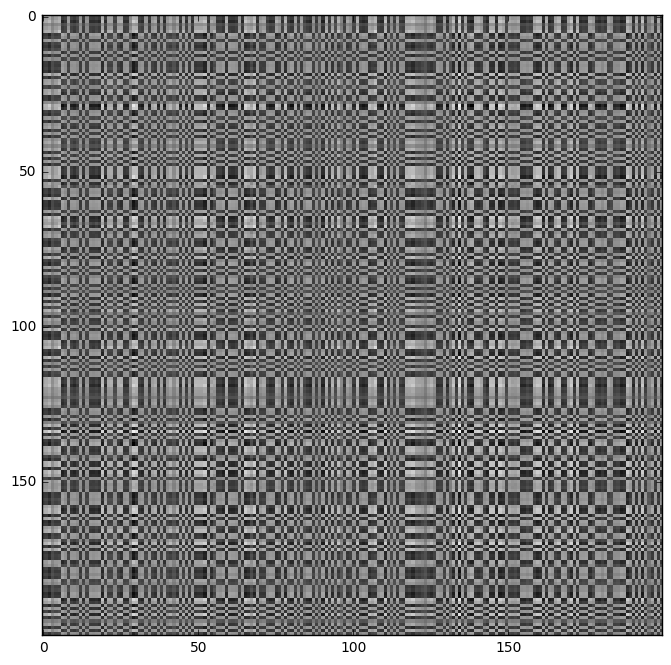

In [642]:
svm_kernel = lambda x, y: np.dot(x, y)
svm_lambda = 0.1

def svm_matrix(X, Y):
    Z = np.zeros((X.shape[0], Y.shape[0]))
    for i in range(X.shape[0]):
        for j in range(Y.shape[0]):
            Z[i, j] = svm_kernel(X[i, :], Y[j, :])
    return Z

X_train_matrix = svm_matrix(X_train, X_train) * np.outer(y_train, y_train)
                                                         
plt.imshow(X_train_matrix)

In [643]:
# minimize 1/2 * x.T * P * x + q.T * x
# subject to G * x < h
#            A * x = b

P = cvxopt.matrix(X_train_matrix)
q = cvxopt.matrix(y_train)
G = cvxopt.matrix(np.eye(N))
h = cvxopt.matrix(np.ones(N) / (2 * N * svm_lambda))
A = cvxopt.matrix(y_train, (1, N))
b = cvxopt.matrix(0.0)

solution = cvxopt.solvers.qp(P, q, G, h, A, b)

c = np.array(solution["x"])


     pcost       dcost       gap    pres   dres
 0:  2.4133e-03 -3.2973e+00  2e+02  1e+01  1e+00
 1:  2.9937e+00 -2.2604e+01  8e+01  4e+00  3e-01
 2:  3.1317e+00 -2.8872e+01  7e+01  4e+00  3e-01
 3:  2.8186e+00 -2.9614e+01  6e+01  2e+00  2e-01
 4:  2.4400e-01 -2.6983e+01  3e+01  1e+00  7e-02
 5:  3.9812e-05 -3.7974e-01  4e-01  1e-02  9e-04
 6:  3.9804e-09 -3.8032e-03  4e-03  1e-04  9e-06
 7:  1.8119e-12 -3.8033e-05  4e-05  1e-06  9e-08
 8:  8.9706e-14 -3.8039e-07  4e-07  1e-08  9e-10
 9: -1.3434e-14 -3.8516e-09  4e-09  1e-10  9e-12
Optimal solution found.


In [644]:
# TODO: calculate b properly!!!

b = np.sum(c.reshape(-1) * y_train * svm_matrix(X_train, X_train).T, axis = 1)
b = np.mean([np.mean(b[y_train > 0]), np.mean(b[y_train < 0])])

In [645]:
def svm_predict(X):  
    return np.sign(np.sum(c.reshape(-1) * y_train * svm_matrix(X_train, X).T, axis = 1) - b)

print(np.sum(c.reshape(-1) * y_train * svm_matrix(X_train, X_train[:99, :]).T, axis = 1))
print((svm_predict(X_train) == y_train).mean())
print("accuracy on training set =", (svm_predict(X_train) == y_train).mean())
print("accuracy on test set =", (svm_predict(X_test) == y_test).mean())


[ -3.59648700e-11  -4.56500115e-11  -3.38569728e-11  -2.07437956e-11
  -3.98621691e-11  -8.17365342e-11   1.12098664e-11   4.13574730e-12
  -4.20757873e-11   1.07072684e-11  -8.94437302e-12   8.26161362e-12
  -1.28826949e-11  -5.65889002e-12  -1.19468879e-11   2.23182584e-12
  -1.11644582e-11   1.30094269e-11  -2.06779038e-12  -3.81125687e-11
   1.77408643e-11  -5.85304305e-11  -6.61635746e-11   5.34813860e-12
  -5.58190993e-11  -3.06889514e-11  -7.12915837e-12   7.98733302e-12
  -3.62287422e-11  -1.97288852e-11  -5.66084957e-11   5.34217115e-12
   2.24831265e-12  -4.62871130e-11   2.98400193e-12  -2.85331203e-11
  -3.04436476e-11  -4.90529839e-12  -2.78176926e-11  -4.32931468e-13
  -3.28404248e-11  -6.02027317e-11  -2.48000925e-11  -4.38989400e-11
   5.40517631e-12  -5.76335091e-11   1.51502699e-11  -7.96174238e-12
  -3.74461573e-12  -5.16296172e-11  -6.00657857e-11  -5.86771465e-11
  -2.57456834e-11   6.31888986e-12  -4.37522241e-12  -6.83700180e-11
   8.37646619e-12   1.06339937e-12

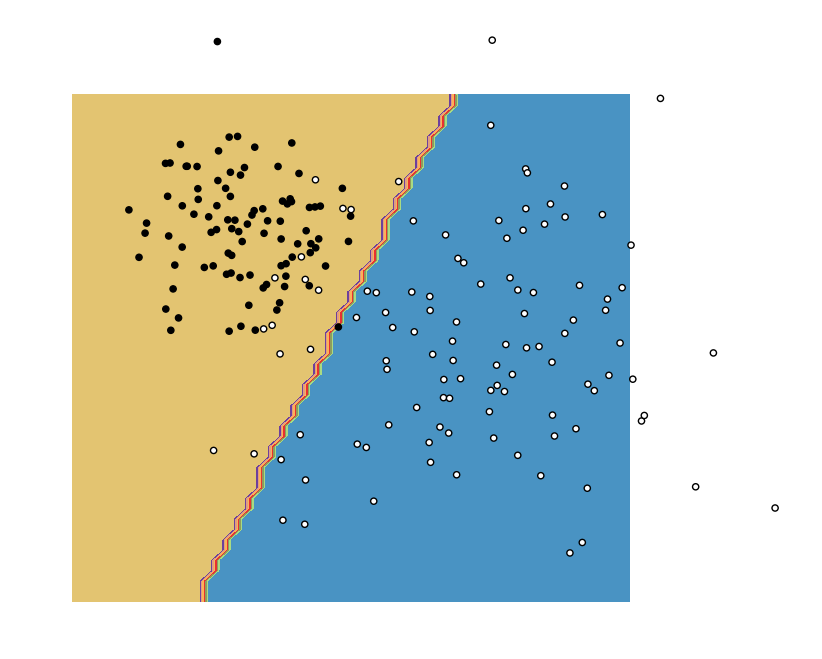

In [646]:
xx, yy = np.meshgrid(np.arange(0, 1, 0.02), np.arange(0, 1, 0.02))
X_boundary = np.c_[xx.ravel(), yy.ravel()]
y_boundary = svm_predict(X_boundary)

plt.contourf(xx, yy, y_boundary.reshape(xx.shape), cmap=plt.cm.Paired)
plt.axis('off')
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train)